In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [2]:
#import data from csv
HeartRiskData = pd.read_csv("/Users/zach/Downloads/framingham.csv")

In [4]:
HeartRiskData.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
HeartRiskData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
HeartRiskData.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Data Visualization


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

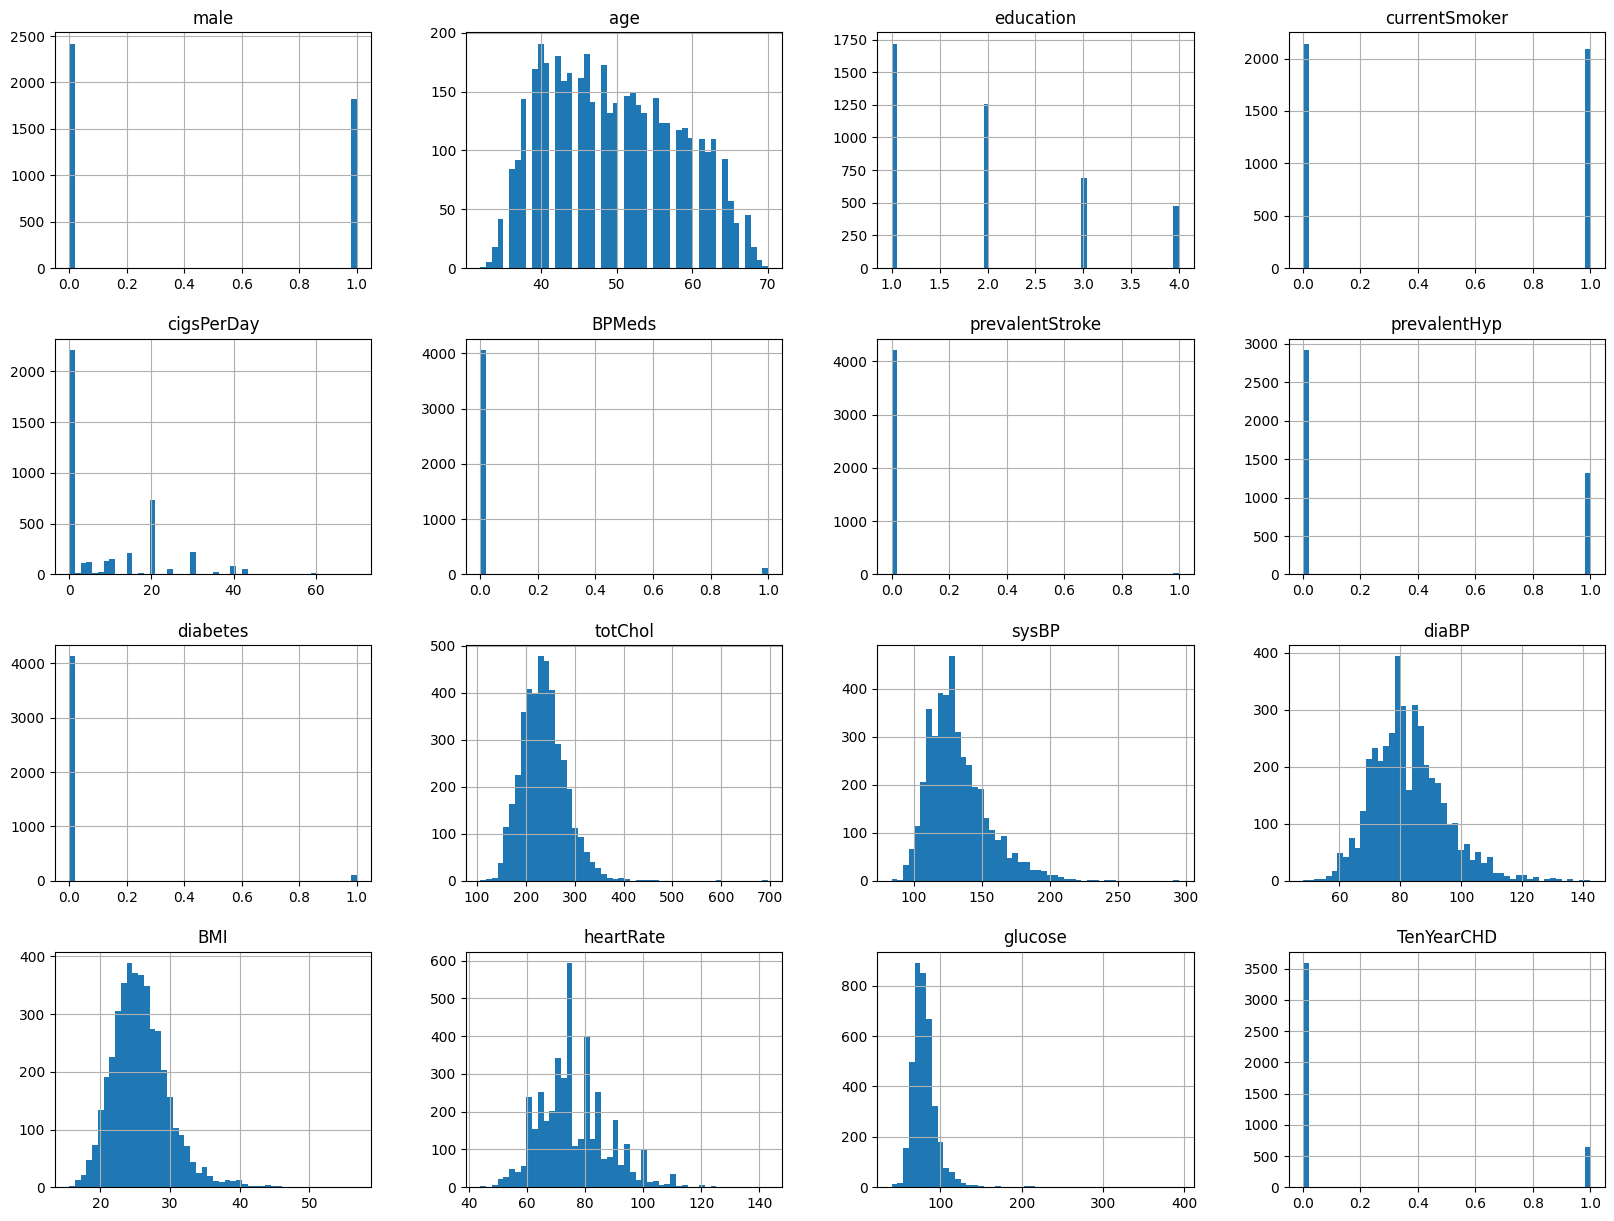

In [7]:
%matplotlib inline
HeartRiskData.hist(bins = 50, figsize=(20,15))


# Data Cleaning

Split data into a training set and test set

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(HeartRiskData, test_size = 0.2, random_state = 5)

In [9]:
train = np.array(train)
test = np.array(test)

In [10]:
print(train)

[[ 0. 53.  2. ... 85. nan  0.]
 [ 1. 52.  1. ... 70. 86.  1.]
 [ 1. 44.  1. ... 72. 76.  0.]
 ...
 [ 1. 62.  1. ... 70. 93.  0.]
 [ 0. 55.  1. ... 76. nan  0.]
 [ 0. 52.  1. ... 75. 64.  0.]]


In [11]:
print(test)

[[  1.  61.   4. ...  63.  75.   0.]
 [  0.  60.   1. ...  95.  72.   1.]
 [  0.  38.   2. ... 100. 113.   0.]
 ...
 [  1.  51.   4. ...  68.  77.   0.]
 [  0.  41.   2. ...  75.  64.   0.]
 [  1.  44.   4. ...  55.  82.   0.]]


In [12]:
print(train.shape[0])
print(train.shape[1])
print(train[1])

3390
16
[  1.    52.     1.     1.    25.     0.     0.     0.     0.   271.
 121.    73.    21.85  70.    86.     1.  ]


Fill empty features (nan) with 0s

In [13]:
train = np.nan_to_num(train)

In [14]:
print(train[1])

[  1.    52.     1.     1.    25.     0.     0.     0.     0.   271.
 121.    73.    21.85  70.    86.     1.  ]


## Feature Scaling 

Scale feature ranges to be between 0-1

In [15]:
def featureNormalization(train, column):
    maxFeatureMatrix = np.amax(train,axis = 0)
    minFeatureMatrix = np.amin(train, axis = 0)
    for j in range(train.shape[0]):
        train[j,column] = (train[j,column]-minFeatureMatrix[column])/(maxFeatureMatrix[column]-minFeatureMatrix[column])
    return(train)
            
    

In [16]:
trainNormalized = featureNormalization(train,1)


In [17]:
print(trainNormalized)

[[ 0.          0.55263158  2.         ... 85.          0.
   0.        ]
 [ 1.          0.52631579  1.         ... 70.         86.
   1.        ]
 [ 1.          0.31578947  1.         ... 72.         76.
   0.        ]
 ...
 [ 1.          0.78947368  1.         ... 70.         93.
   0.        ]
 [ 0.          0.60526316  1.         ... 76.          0.
   0.        ]
 [ 0.          0.52631579  1.         ... 75.         64.
   0.        ]]


In [18]:
trainNormalized = featureNormalization(train,1)
trainNormalized = featureNormalization(train,4)
trainNormalized = featureNormalization(train,9)
trainNormalized = featureNormalization(train,10)
trainNormalized = featureNormalization(train,11)
trainNormalized = featureNormalization(train,12)
trainNormalized = featureNormalization(train,13)
trainNormalized = featureNormalization(train,14)


In [19]:
print(trainNormalized)

[[0.         0.55263158 2.         ... 0.59440559 0.         0.        ]
 [1.         0.52631579 1.         ... 0.48951049 0.21827411 1.        ]
 [1.         0.31578947 1.         ... 0.5034965  0.1928934  0.        ]
 ...
 [1.         0.78947368 1.         ... 0.48951049 0.23604061 0.        ]
 [0.         0.60526316 1.         ... 0.53146853 0.         0.        ]
 [0.         0.52631579 1.         ... 0.52447552 0.16243655 0.        ]]


In [20]:
print(trainNormalized[:,1])

[0.55263158 0.52631579 0.31578947 ... 0.78947368 0.60526316 0.52631579]


In [21]:
print(trainNormalized.shape)

(3390, 16)


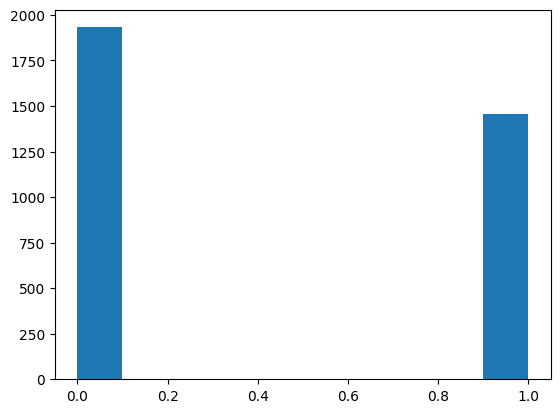

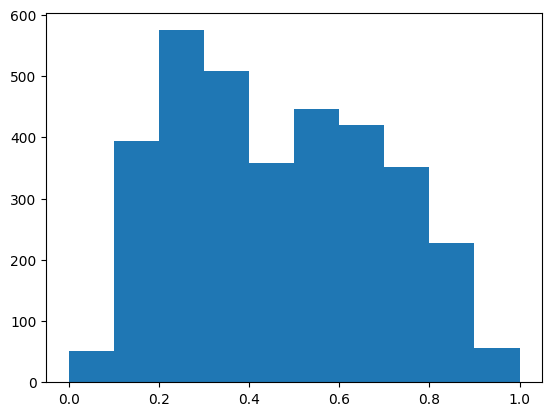

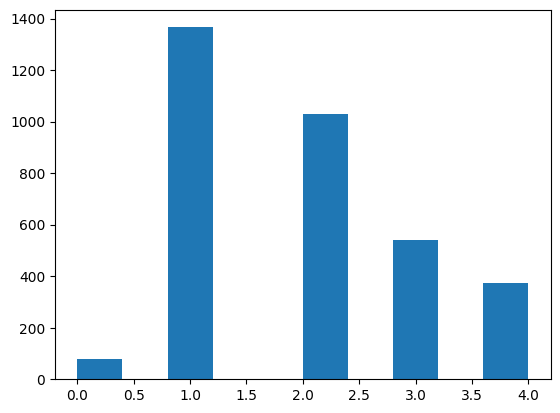

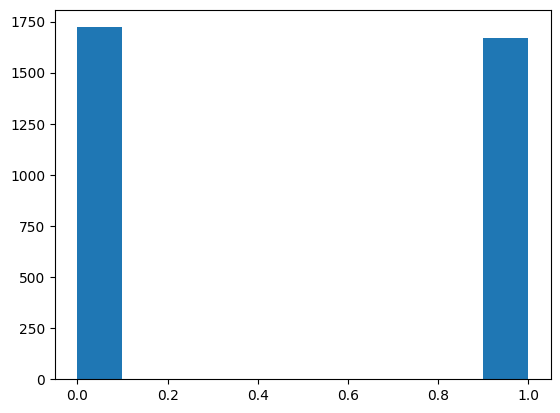

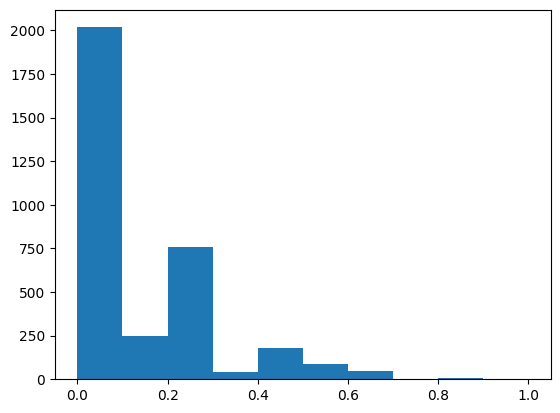

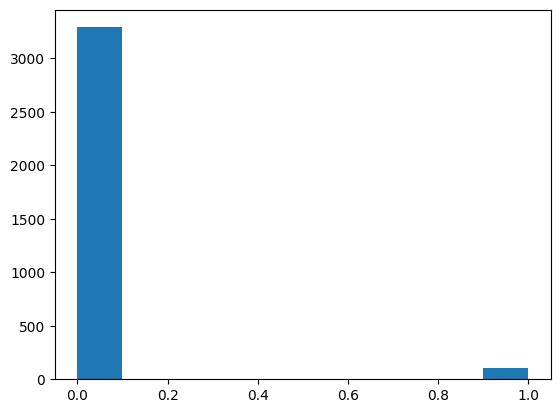

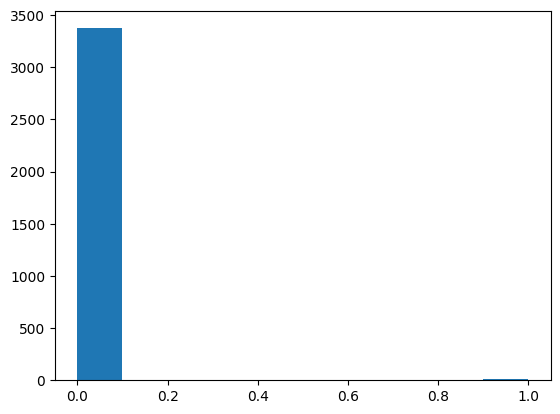

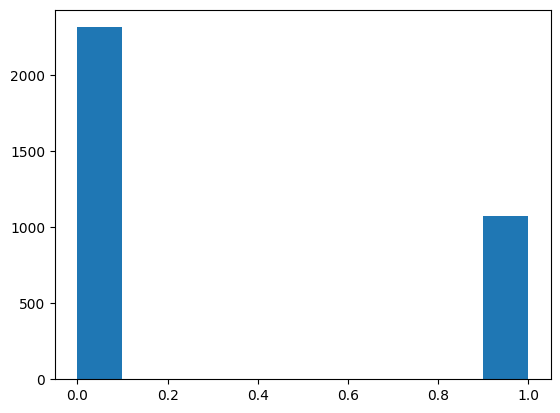

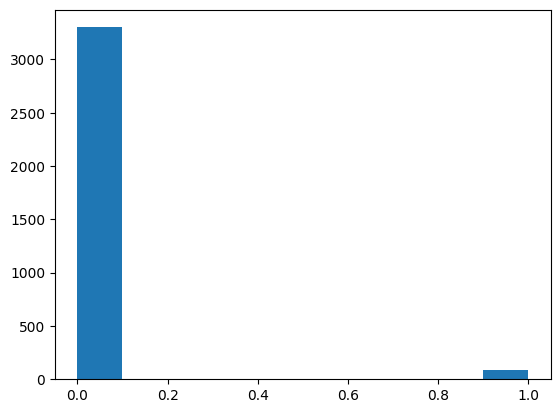

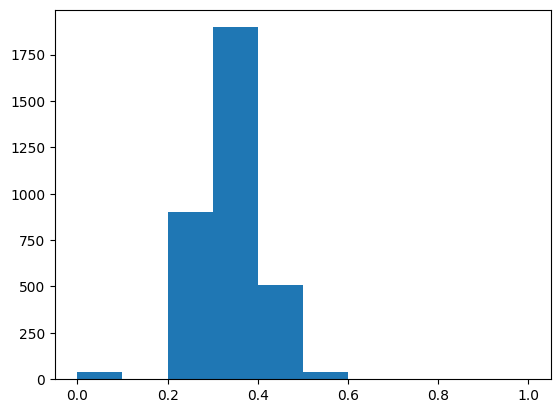

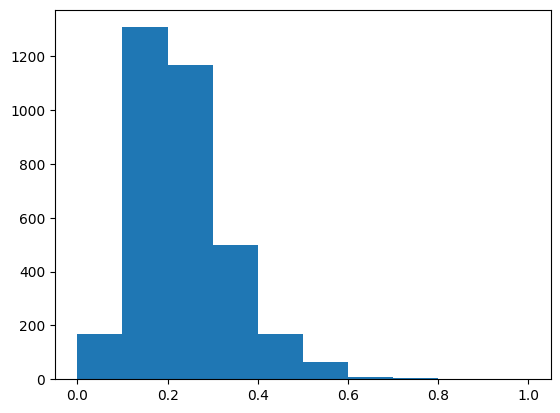

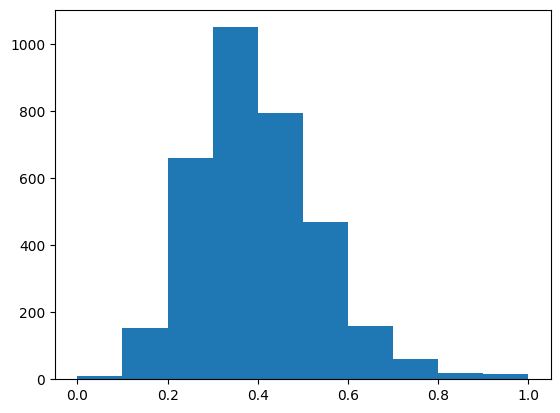

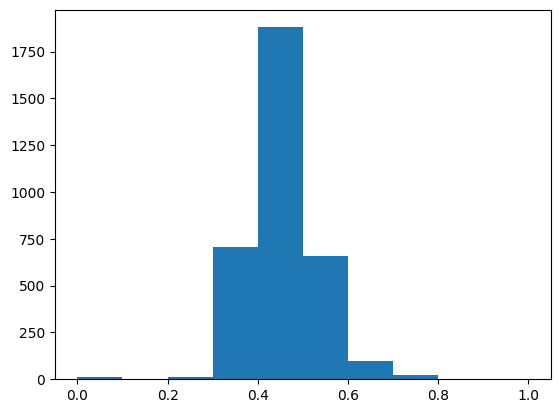

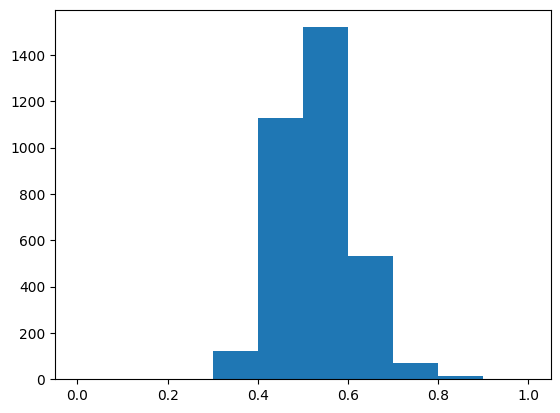

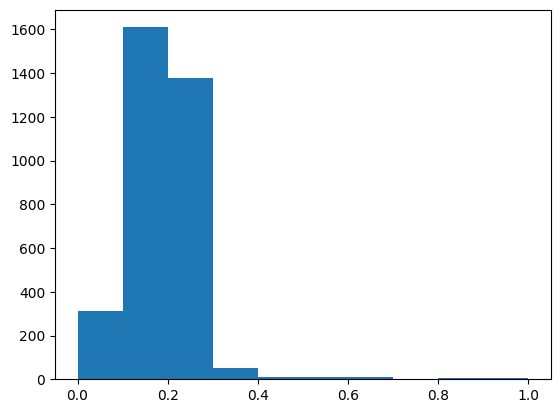

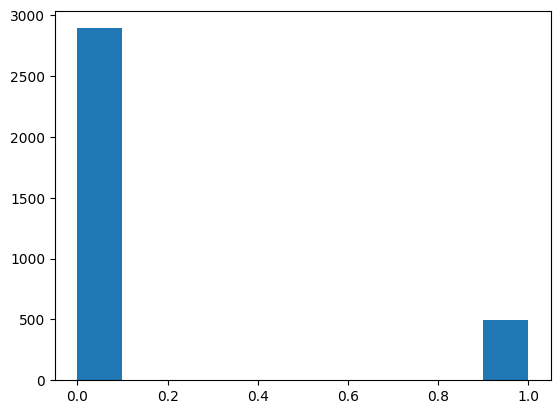

In [22]:
for i in range(trainNormalized.shape[1]):
    plt.hist(trainNormalized[:,i])
    plt.show()

# Cost Function

In [23]:
def computeCost(train,w,b):
    cost = 0
    for i in range(train.shape[0]):
        prediction = 1/(1 + math.exp(-1*(np.dot(train[i],w)+b)))
        cost += train[i,15]*math.log(prediction)+(1-train[i,15])*math.log(1-prediction)
    
    return -cost/train.shape[0]
                   

In [24]:
g = computeCost(trainNormalized,np.zeros(trainNormalized.shape[1]),0)

In [25]:
print(g)

0.693147180559932


Intialization of w and b

In [26]:
w = np.zeros(train.shape[1])
print(w)
b = 0

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Gradient Calculation 

In [27]:
def computeGradient(train,w,b):
    
    dj_dw = np.zeros(train.shape[1])
    dj_db = 0
    for i in range(train.shape[0]):
        prediction = 1/(1+math.exp(-np.dot(train[i],w)+b))
        for j in range(train.shape[1]):
            dj_dw[j] += (prediction - train[i,15])*train[i,j]
        dj_db += prediction-train[i,15]
    return dj_dw/train.shape[0] , dj_db/train.shape[0]
    
        
            
            

# Gradient Descent Implementation

In [28]:
def gradientDescent(train, w, b, epochs, alpha):
    iterations = []
    cost = []
    for i in range(epochs):
        dj_dw , dj_db = computeGradient(train,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if(i%100 == 0):
            cost.append(computeCost(train,w,b))
            iterations.append(i)
            print(computeCost(train,w,b))
    plt.plot(iterations, cost)
    return w , b

0.6852469363716537
0.430931401268488
0.411988885340829
0.41106021161536577
0.41126034810995965
0.41089473224789275
0.4102078001374867
0.4096151379144504
0.40943035357302204
0.4098500329903973


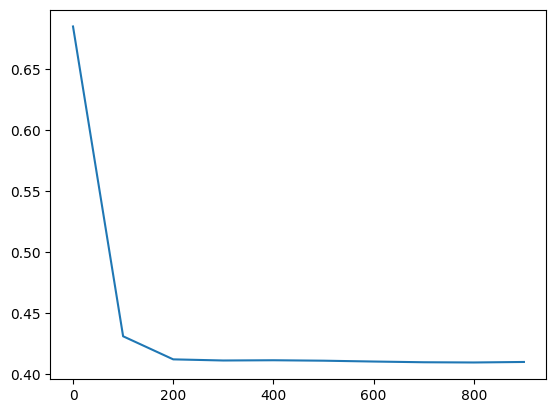

In [32]:
w_final, b_final = gradientDescent(trainNormalized, w, b, 1000, 0.01)

In [35]:
print(trainNormalized)

[[0.         0.55263158 2.         ... 0.59440559 0.         0.        ]
 [1.         0.52631579 1.         ... 0.48951049 0.21827411 1.        ]
 [1.         0.31578947 1.         ... 0.5034965  0.1928934  0.        ]
 ...
 [1.         0.78947368 1.         ... 0.48951049 0.23604061 0.        ]
 [0.         0.60526316 1.         ... 0.53146853 0.         0.        ]
 [0.         0.52631579 1.         ... 0.52447552 0.16243655 0.        ]]


In [36]:
from sklearn.linear_model import LogisticRegression
trainNorm = np.delete(trainNormalized, 15, 1)
targets = trainNormalized[:,15]
lr_model = LogisticRegression()
lr_model.fit(trainNorm, targets)

LogisticRegression()

In [37]:
print("Accuracy on training set:", lr_model.score(trainNorm, y=targets))

Accuracy on training set: 0.8587020648967552


In [38]:
test = np.nan_to_num(test)

In [39]:
print(test)

[[  1.  61.   4. ...  63.  75.   0.]
 [  0.  60.   1. ...  95.  72.   1.]
 [  0.  38.   2. ... 100. 113.   0.]
 ...
 [  1.  51.   4. ...  68.  77.   0.]
 [  0.  41.   2. ...  75.  64.   0.]
 [  1.  44.   4. ...  55.  82.   0.]]


In [40]:
testNormalized = featureNormalization(test,1)
testNormalized = featureNormalization(test,4)
testNormalized = featureNormalization(test,9)
testNormalized = featureNormalization(test,10)
testNormalized = featureNormalization(test,11)
testNormalized = featureNormalization(test,12)
testNormalized = featureNormalization(test,13)
testNormalized = featureNormalization(test,14)



In [41]:
print(test)

[[1.         0.75       4.         ... 0.17333333 0.25684932 0.        ]
 [0.         0.72222222 1.         ... 0.6        0.24657534 1.        ]
 [0.         0.11111111 2.         ... 0.66666667 0.3869863  0.        ]
 ...
 [1.         0.47222222 4.         ... 0.24       0.26369863 0.        ]
 [0.         0.19444444 2.         ... 0.33333333 0.21917808 0.        ]
 [1.         0.27777778 4.         ... 0.06666667 0.28082192 0.        ]]


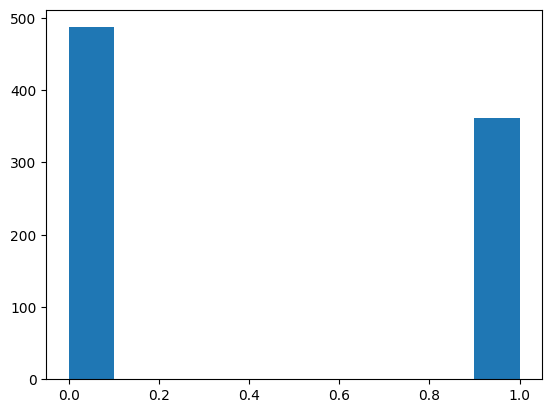

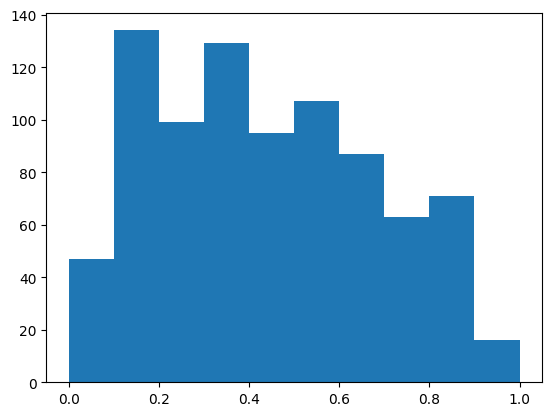

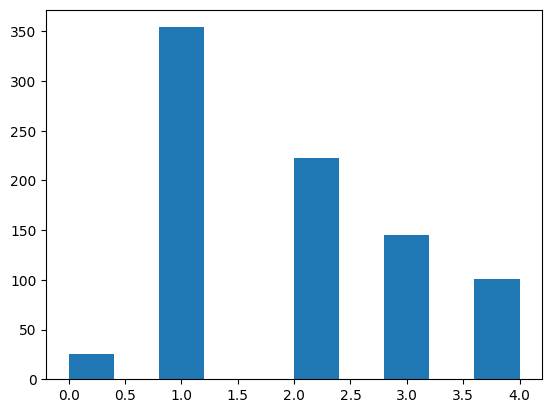

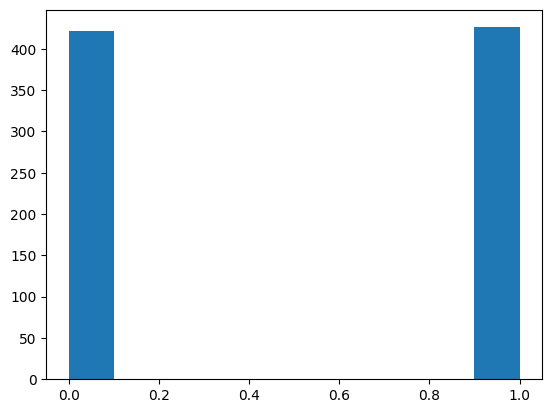

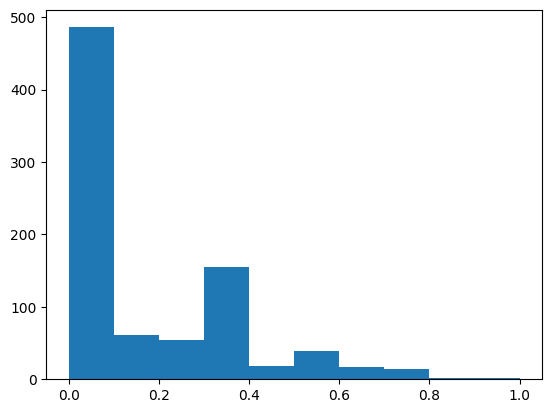

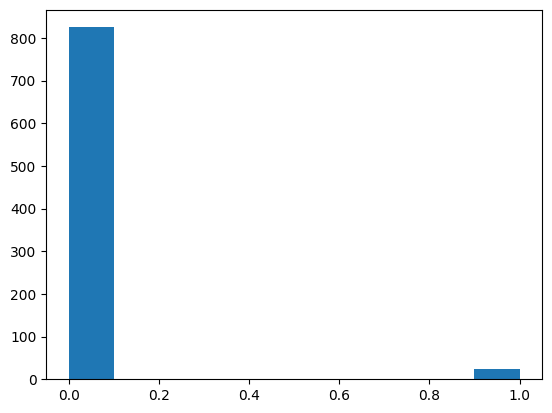

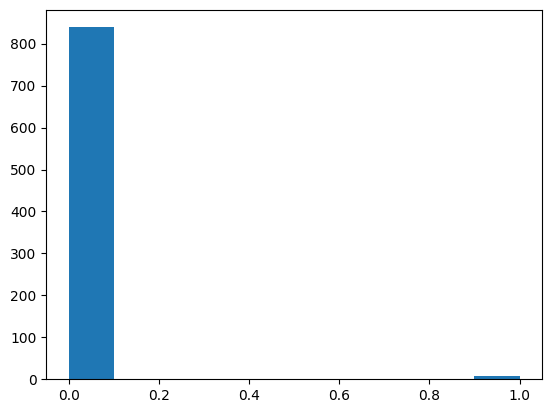

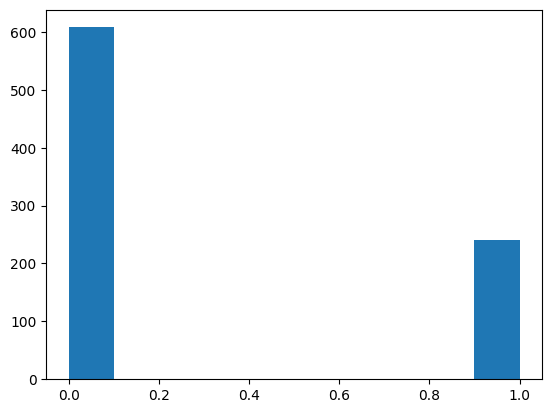

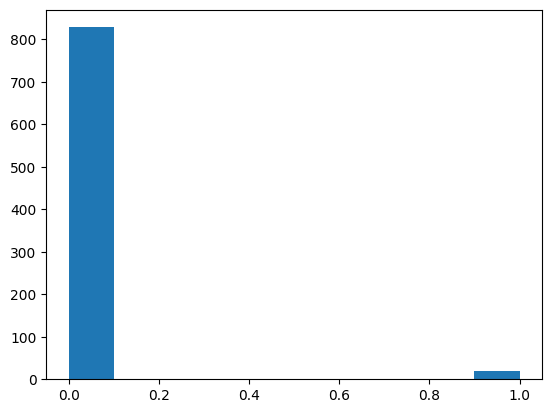

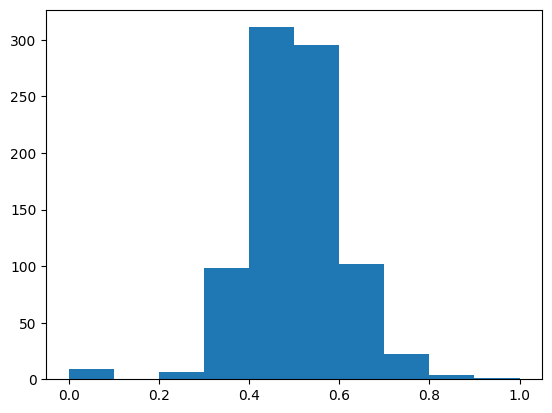

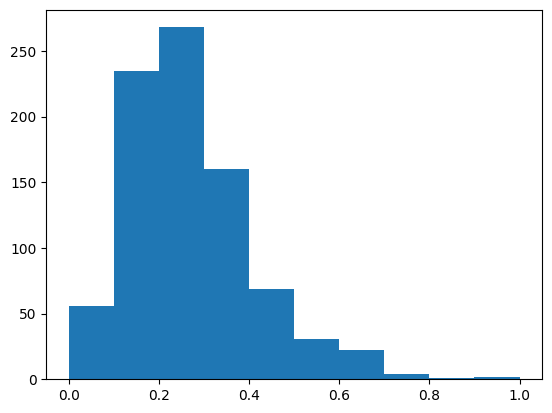

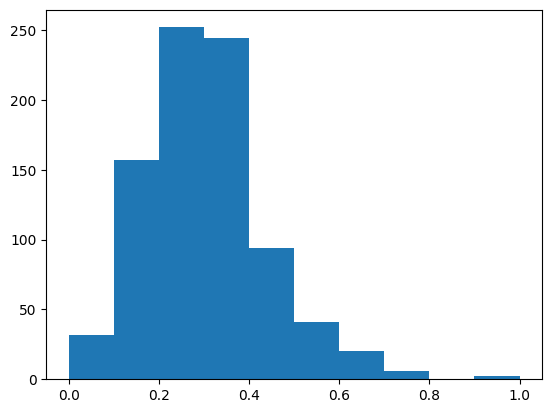

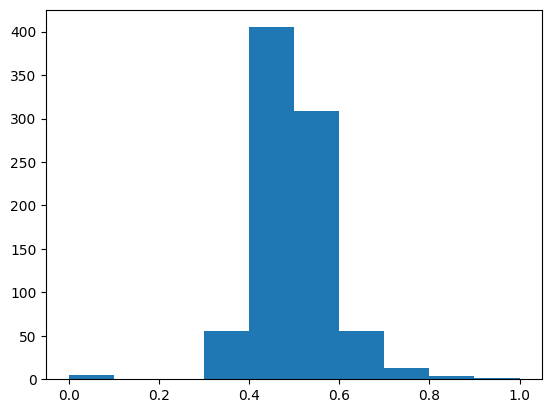

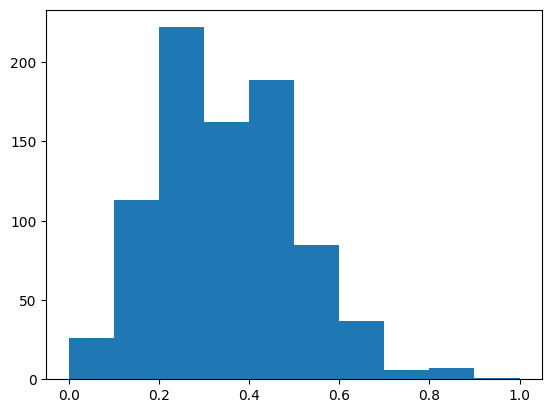

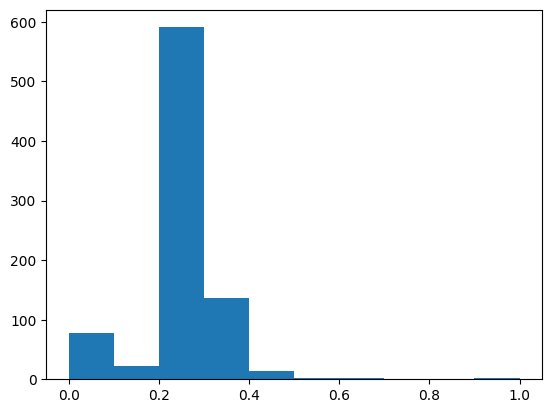

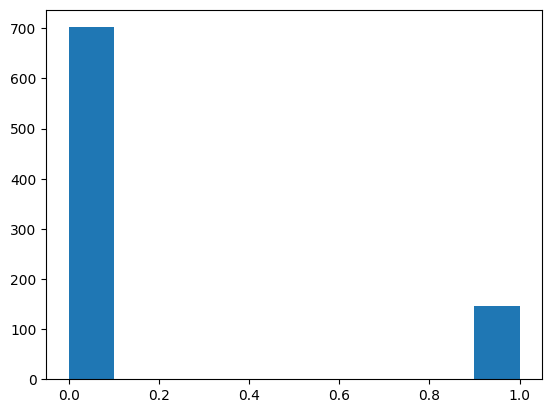

In [42]:
for i in range(testNormalized.shape[1]):
    plt.hist(testNormalized[:,i])
    plt.show()

In [43]:
testNorm = np.delete(testNormalized, 15, 1)
test_targets = testNormalized[:,15]

In [44]:
print("Accuracy on test set:", lr_model.score(testNorm, y=test_targets))

Accuracy on test set: 0.8349056603773585
